<a href="https://colab.research.google.com/github/JuanRenza/Imagenes/blob/master/Clase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ACCESO AL DRIVE** 

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LIBRERIAS Y METODOS**

In [30]:
#Importo las librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

%matplotlib inline
%cd /content/drive/My Drive/colab/Imagenes

def readRGB(a):
  img = cv2.imread(a, cv2.IMREAD_COLOR)
  imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return imgRGB

def displayColor2(a,b,title1="",title2=""):
  plt.figure(figsize=(20,20))
  plt.subplot(121),plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()

def displayGray2(a,b,title1="",title2=""):
  plt.figure(figsize=(20,20))
  plt.subplot(121),plt.imshow(a, cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b, cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()

def display3(a,b,c,title1="",title2="",title3=""):
  plt.figure(figsize=(20,20))
  plt.subplot(131),plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()

/content/drive/My Drive/colab/Imagenes


**INTERPOLACIÓN VECINO CERCANO**

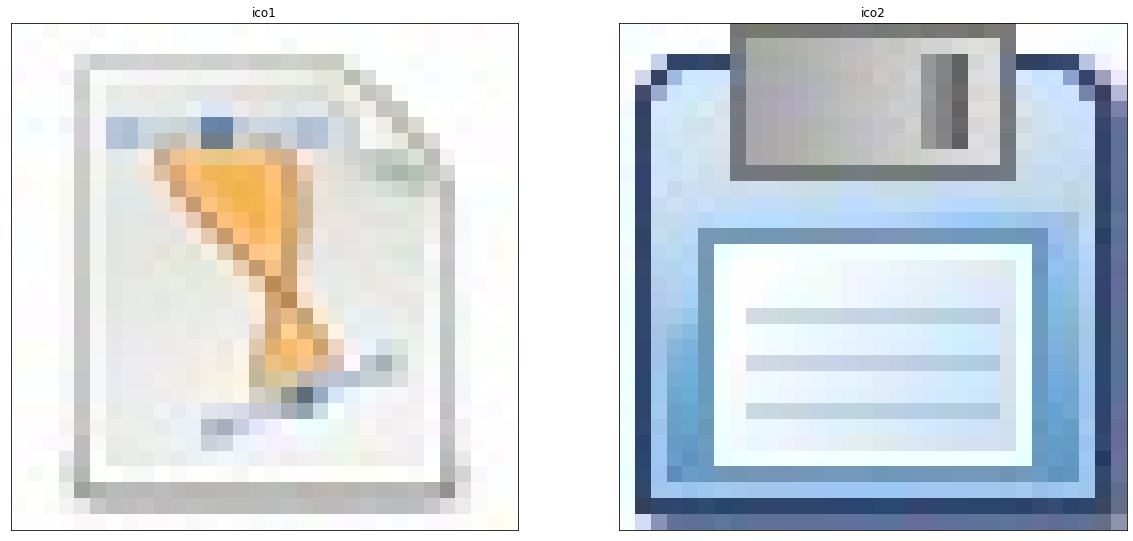

In [31]:
imgA = readRGB('ico.jpg')
imgB = readRGB('ico2.jpg')

near_imgA = cv2.resize(imgA,None,fx=5,fy=5,interpolation = cv2.INTER_NEAREST)
near_imgB = cv2.resize(imgB,None,fx=5,fy=5,interpolation = cv2.INTER_NEAREST)

displayColor2(near_imgA,near_imgB,"ico1","ico2")

**INTERPOLACIÓN BILINEAR**



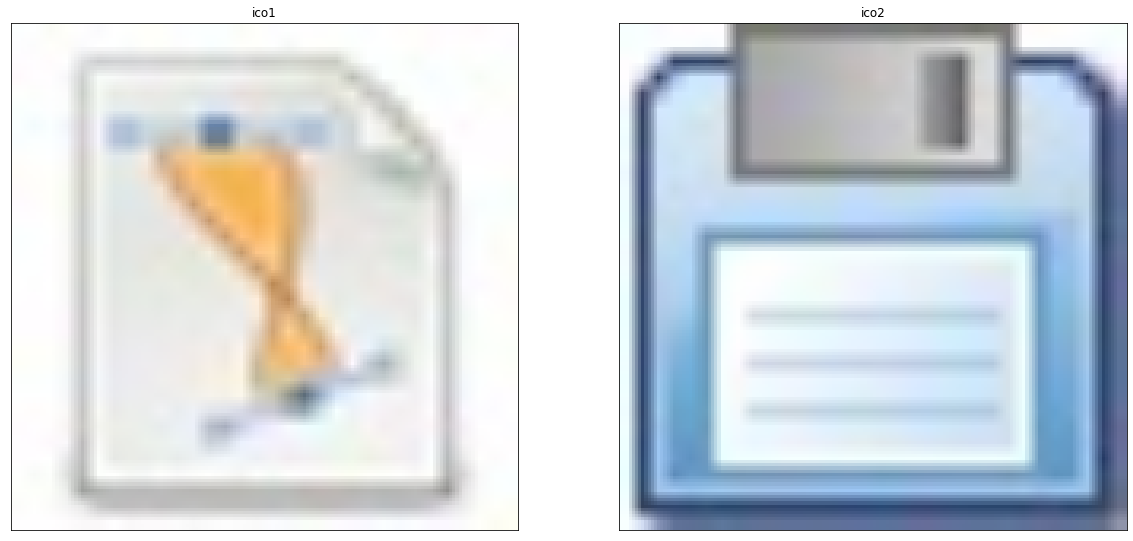

In [32]:
bili_imgA = cv2.resize(imgA,None,fx=5,fy=5,interpolation = cv2.INTER_LINEAR)
bili_imgB = cv2.resize(imgB,None,fx=5,fy=5,interpolation = cv2.INTER_LINEAR)

displayColor2(bili_imgA,bili_imgB,"ico1","ico2")

**INTERPOLACIÓN BICUBICA**


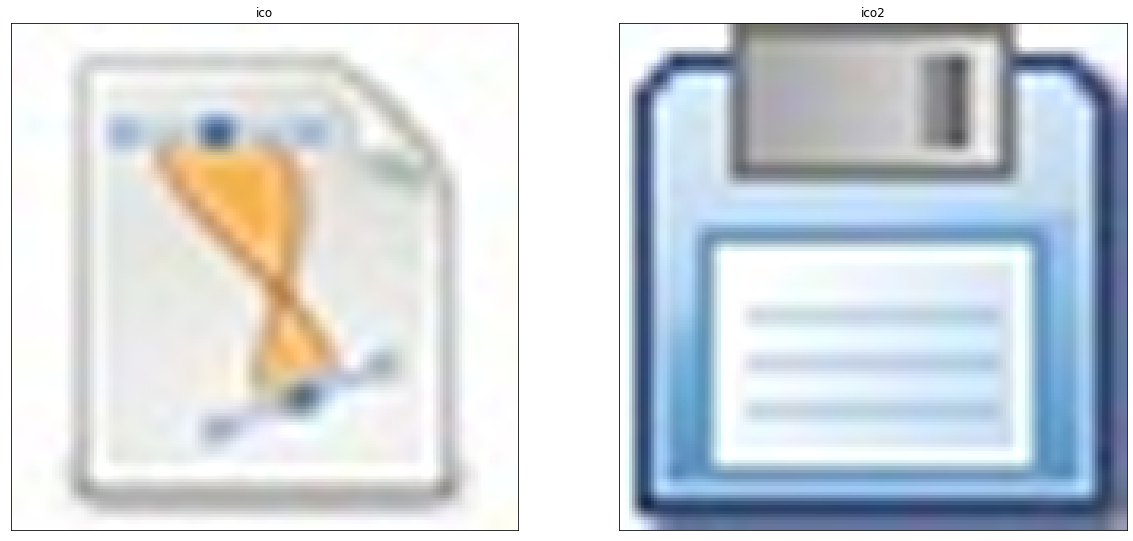

In [33]:
bicu_imgA = cv2.resize(imgA,None,fx=5,fy=5,interpolation = cv2.INTER_CUBIC)
bicu_imgB = cv2.resize(imgB,None,fx=5,fy=5,interpolation = cv2.INTER_CUBIC)
displayColor2(bicu_imgA,bicu_imgB,"ico","ico2")

**COMPARACIÓN**


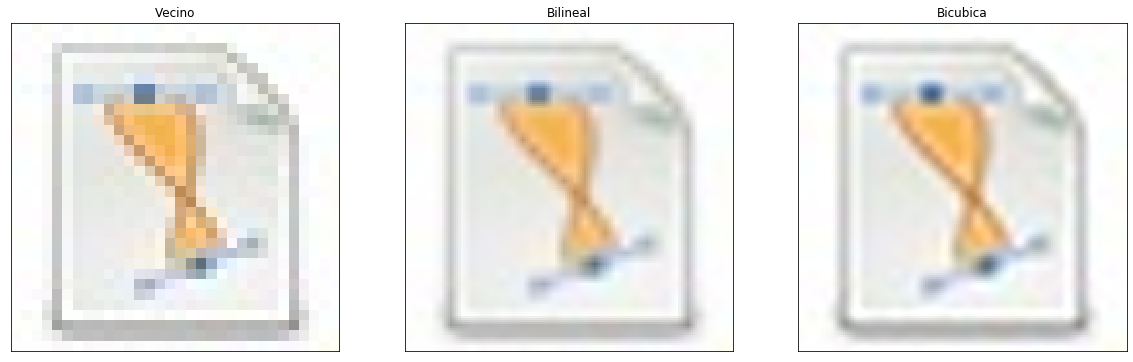

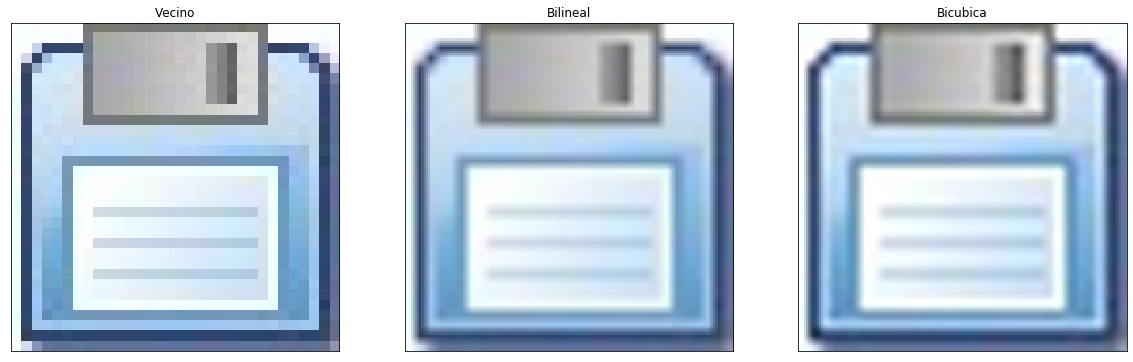

In [34]:
display3(near_imgA, bili_imgA, bicu_imgA, "Vecino","Bilineal","Bicubica")
display3(near_imgB, bili_imgB, bicu_imgB, "Vecino","Bilineal","Bicubica")

**TODOS LOS METODOS DE INTERPOLACIÓN**


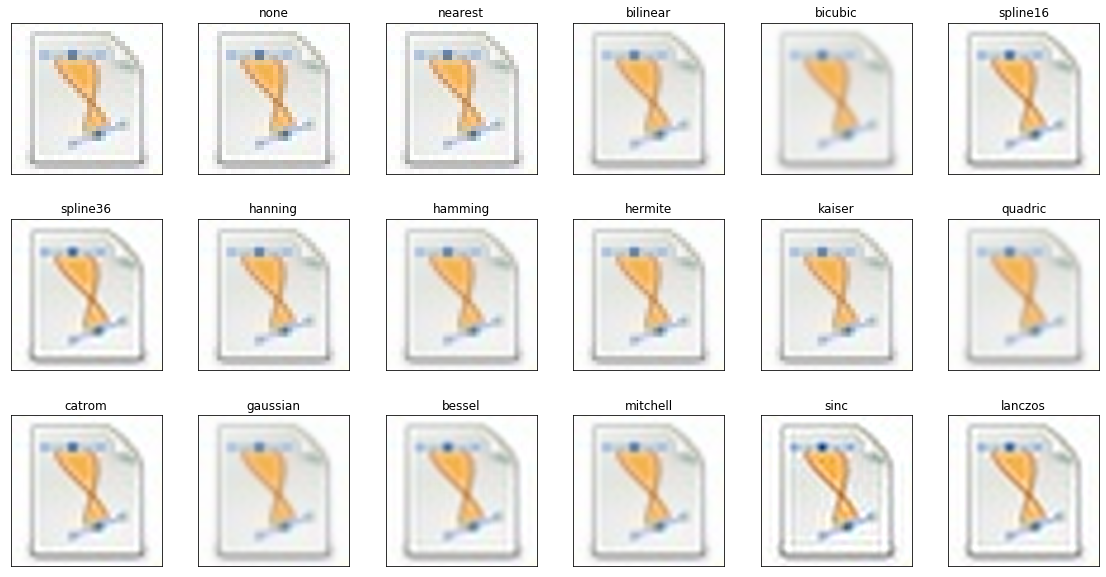

In [35]:
methods = [None,'none','nearest','bilinear','bicubic','spline16','spline36','hanning','hamming','hermite','kaiser','quadric','catrom','gaussian','bessel','mitchell','sinc','lanczos']
#grid = np.random.rand(4, 4)
grid = imgA

fig, axes = plt.subplots(3,6,figsize=(20,10),subplot_kw={'xticks':[],'yticks':[]})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
  ax.imshow(grid,interpolation=interp_method)
  ax.set_title(interp_method)

plt.show()

**MASCARAS Y ESPACIALIDAD**


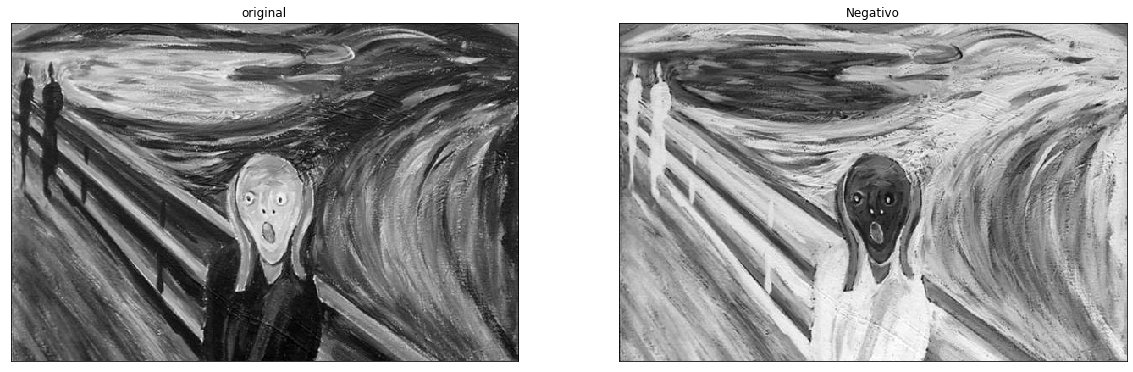

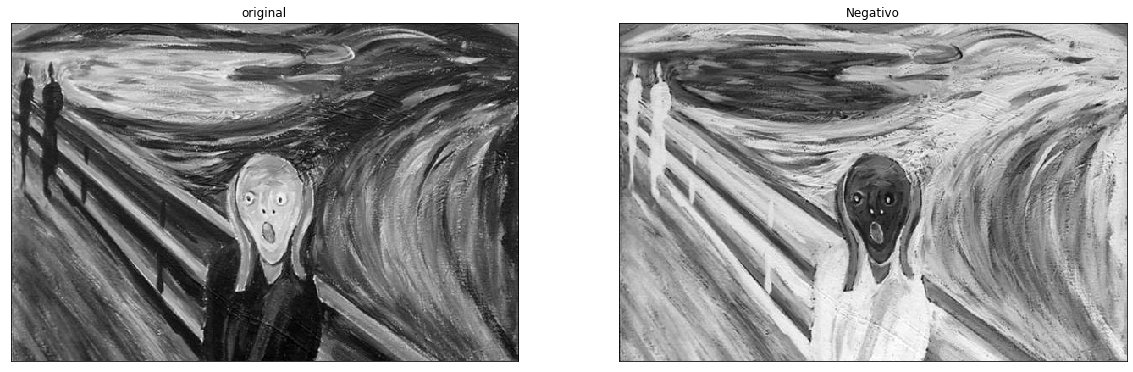

In [43]:
def negative(l):
  #Cargar imagen
  img = cv2.imread("prueba3.jpg",cv2.IMREAD_GRAYSCALE)
  rows, columns = img.shape
  img2 = np.zeros((rows,columns),dtype = np.uint8)
  for x in range(rows):
    for y in range(columns):
      img2[x,y] = (l-1)-img[x,y]
    
  displayGray2(img,img2,'original','Negativo')
  return

negative(0)
negative(256)